In [15]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

#read text file into a data frame
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
data=pd.read_csv(filename)
print(data)

       Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0      2011      1           1          6   1400.0   1500.0            AA   
1      2011      1           2          7   1401.0   1501.0            AA   
2      2011      1           3          1   1352.0   1502.0            AA   
3      2011      1           4          2   1403.0   1513.0            AA   
4      2011      1           5          3   1405.0   1507.0            AA   
5      2011      1           6          4   1359.0   1503.0            AA   
6      2011      1           7          5   1359.0   1509.0            AA   
7      2011      1           8          6   1355.0   1454.0            AA   
8      2011      1           9          7   1443.0   1554.0            AA   
9      2011      1          10          1   1443.0   1553.0            AA   
10     2011      1          11          2   1429.0   1539.0            AA   
11     2011      1          12          3   1419.0   1515.0            AA   

Q1 - which carriers have most air time? 
By answering this qiestion we will be able to dissect which airline carrier spent more time in air. This can help the executives to identify which carriers will be needing maintenance the most - the more airplanes are being used, the more maintenance they would need

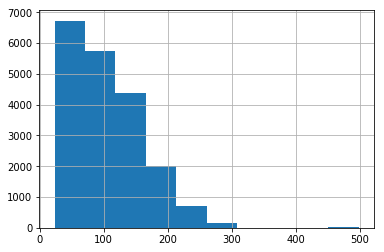

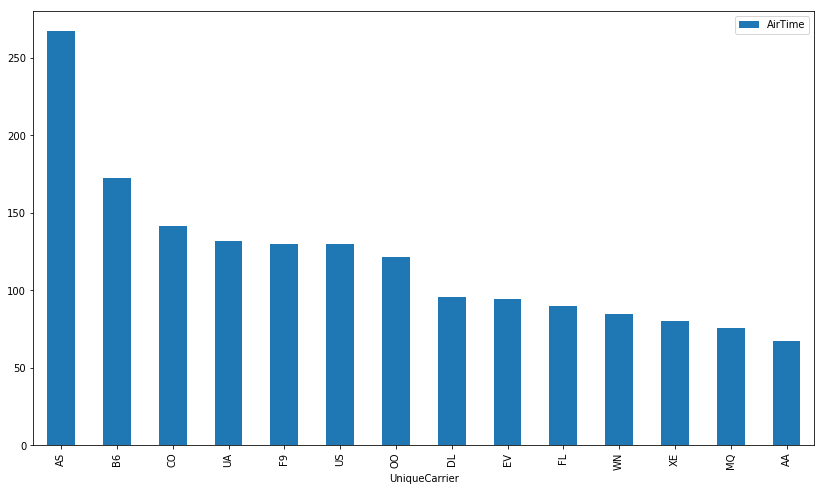

In [83]:
# we will create a histogram distribution of Airtime in each flight
# Airtime of different planes is between 0-100\
# there are some extreme cases where airtime is 500 mins
# to answer this question, we will use the column air time, 

airtime=data.loc[data.AirTime.isna()==False,'AirTime']

airtime.hist()
plt.show()

# Summary: In this distribution most of the planes airtime is between 0-100
# there are some extreme cases that have 500 mins airtime in 1 flight.

#Now, in order to answer, which carrier has top mean airtime we will use slicing and use main 2 columns:'UniqueCarrier','AirTime' 
# we will define data1 so we won't mess the data frame from before
datax=data[['UniqueCarrier','AirTime']]

datax=data[['UniqueCarrier','AirTime']] 
datax=datax.groupby('UniqueCarrier')['AirTime'].mean().reset_index()# we will group by carrier and will get average airtime in each carrier.
datax=datax.sort_values('AirTime',ascending=False).reset_index(drop=True) # sort descending order by air time
datax.iloc[0:20].plot.bar(x='UniqueCarrier',y = 'AirTime',figsize=(14,8)) 

plt.show() # print the bar graph

# By looking at the graph, it is clearly that AS airlines is in the top of mean airtime 
# from this we can conclude that this carrier requiring frequent maintenance

Q2 what is the day of the month that people fly the most
By plotting it, we could find the top days in the month so airline companies can better market their campaigns. For instance, we can provide different packages if we get to know that more flights are occurring on weekends, we can design such campaigns that we target the people with different holiday packages to increase our profits

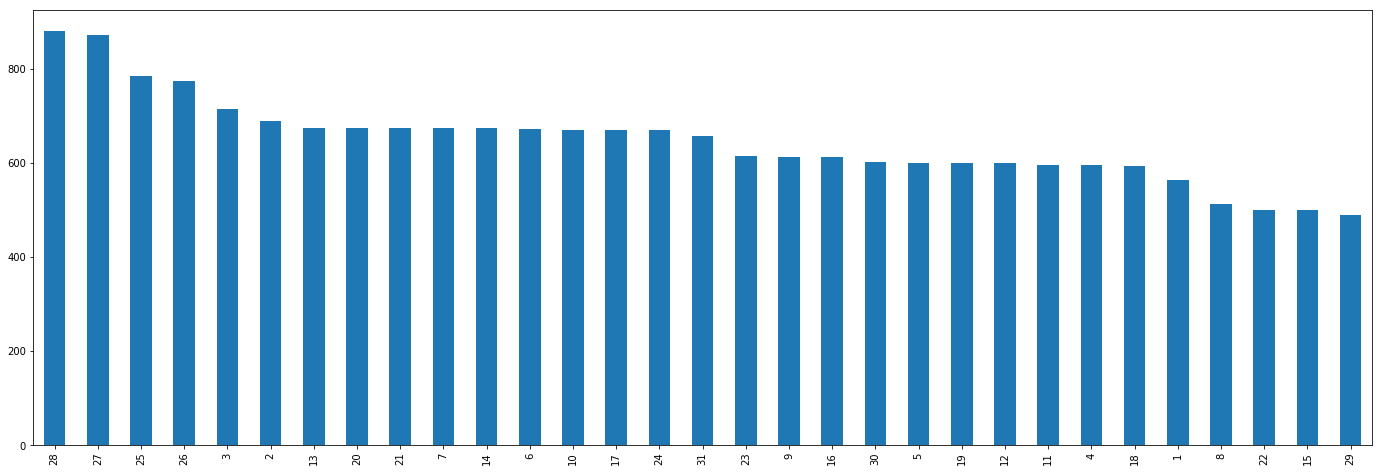

In [82]:
# days: 1=Monday and 7=Sunday
dayofmonth_flights=data['DayofMonth']
dayofmonth_flights=pd.value_counts(dayofmonth_flights)
dayofmonth_flights.plot( kind='bar',figsize=(24,8))
plt.show()


# looking at the bar chart, it seems 27 and 28th day of month are most travelling days.
# We can assume that people travel in the end of the month because of work or more of a free time, and market the campaigns close to the end of the month

Q3 Where are most of the delays in flight?
This can help us to indetify the gaps and make efforts for decreasing them. For example if we know we are getting delays at Departure or Arrival or some specific City we can investigate and try to decrease the delays. because less delays means we save money on fuel and we can save our money and get more profits

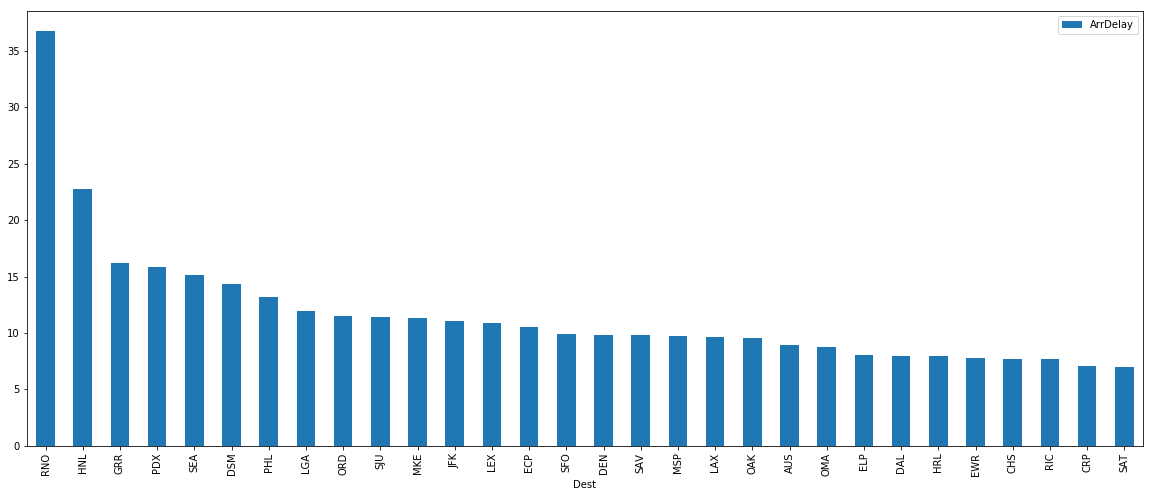

In [72]:
datax=data[['ArrDelay','Dest']].copy() # we will create a copy of the dataframe, so we won't mess the one before
datax=datax.groupby('Dest')['ArrDelay'].mean().reset_index()
datax=datax.sort_values('ArrDelay',ascending=False).reset_index(drop=True)
datax.iloc[0:30].plot(x='Dest',y='ArrDelay',kind='bar',figsize=(20,8))
plt.show()

#RNO Airport has the most average Arrival delay 
#this means that we need to dissect it in order to save create a better customer service, save money and time at the 
#destination airport